In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
input_file = "../data/projects.csv"
raw = pd.read_csv(input_file)
raw.head()

,project_id,project_name,team_size,budget,workload,completion_time
0,1,Berenguer,4,103000,M,3.0
1,2,Ehrhart,4,120000,M,3.0
2,3,Arnett,3,53000,M,2.0
3,4,Stutts,4,65000,M,3.0
4,5,Turner,9,186000,L,5.0


In [4]:
data = raw.copy()
data.info(); data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   project_id       1000 non-null   int64  
 1   project_name     1000 non-null   object 
 2   team_size        1000 non-null   int64  
 3   budget           1000 non-null   int64  
 4   workload         1000 non-null   object 
 5   completion_time  1000 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


,project_id,team_size,budget,completion_time
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,3.991000,90141.000000,2.704000
std,288.819436,1.665441,33422.360377,1.116078
min,1.000000,1.000000,11000.000000,1.000000
25%,250.750000,3.000000,65000.000000,2.000000
50%,500.500000,4.000000,89000.000000,3.000000
75%,750.250000,5.000000,115250.000000,3.000000
max,1000.000000,11.000000,188000.000000,7.000000


In [5]:
data_features = data[["team_size", "budget", "workload"]].copy()
data_features = pd.get_dummies(data_features, columns = ["workload"]) 

data_target = data[["completion_time"]].copy()

In [6]:
data_train, data_test, label_train, label_test = train_test_split(data_features, data_target, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(data_train, label_train) 
label_predict = model.predict(data_test)
print(f"Accuracy score of the model against the training data is {model.score(data_train, label_train)}")
print(f"Accuracy score of the model against the testing data is {model.score(data_test, label_test)}")

Accuracy score of the model against the training data is 0.8647498594388395
Accuracy score of the model against the testing data is 0.8685173190918136


In [7]:
pickle.dump(model, open('model.pkl','wb'))

In [8]:
projects = pd.read_csv("../data/projects.csv")
tasks = pd.read_csv("../data/tasks.csv")
users = pd.read_csv("../data/users.csv")

In [9]:
projects.head()

,project_id,project_name,team_size,budget,workload,completion_time
0,1,Berenguer,4,103000,M,3.0
1,2,Ehrhart,4,120000,M,3.0
2,3,Arnett,3,53000,M,2.0
3,4,Stutts,4,65000,M,3.0
4,5,Turner,9,186000,L,5.0


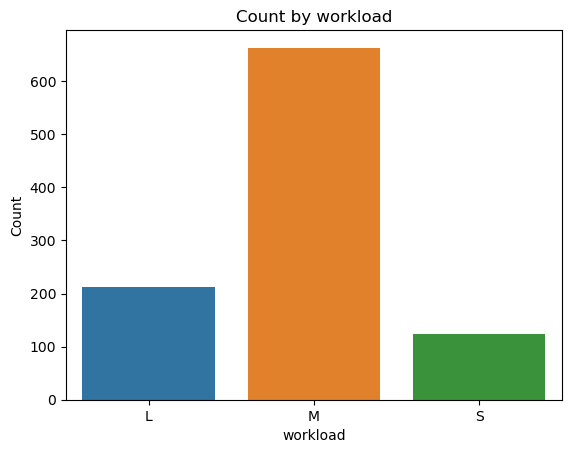

In [10]:
project_id = projects[["workload"]].groupby(["workload"]).size().reset_index(name = "Count")

sns.barplot(project_id, y = "Count", x = "workload").set(title = "Count by workload");

In [11]:
tasks.head()

,task_id,project_id,user_id,status,estimated_duration,due_date,description
0,1,1,429,incomplete,2,2024-02-27,Design and implement user onboarding process
1,2,2,461,complete,7,2024-02-24,Develop interactive data visualization components
2,3,3,93,incomplete,1,2024-02-15,Develop recommendation engine
3,4,4,480,incomplete,8,2024-02-17,Set up CI/CD pipeline
4,5,5,419,incomplete,5,2024-02-28,Implement SEO best practices


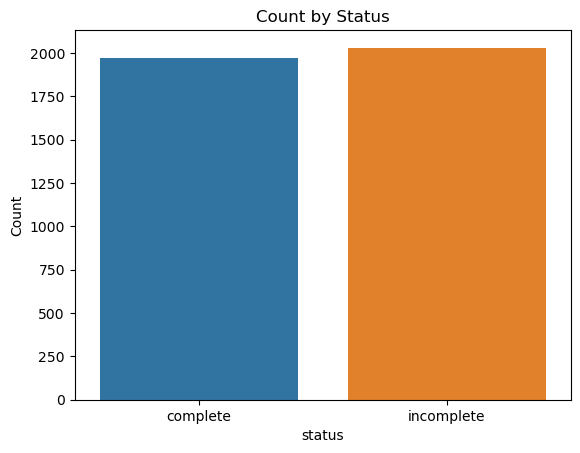

In [12]:
status = tasks[["status"]].groupby(["status"]).size().reset_index(name = "Count")

sns.barplot(status, y = "Count", x = "status").set(title = "Count by Status");


In [13]:
users.head()

,user_id,username,password,role
0,1,Donald1,zrda,member
1,2,Doreen2,1htj,manager
2,3,Christopher3,7axj,member
3,4,Donald4,w045,manager
4,5,Melinda5,sgrd,member


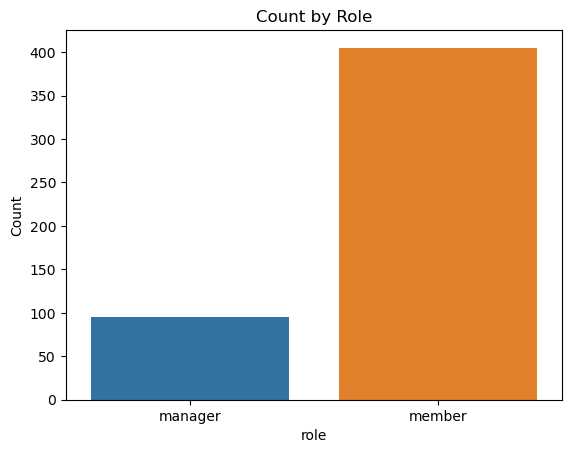

In [14]:
is_manager = users[["role"]].groupby(["role"]).size().reset_index(name = "Count")

sns.barplot(is_manager, y = "Count", x = "role").set(title = "Count by Role");
